# My resume data

## Libaries

In [160]:
import pandas as pd
import numpy as np
import uuid
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## ETL


### Extracting data

Extraindo dados da planilha "superior courses" que correspondem aos dados relacionados aos cursos superiores.

In [161]:
superior = pd.read_excel('/content/data/raw/my_resume_data.xlsx', sheet_name="superior_courses")
superior.head(3)

,title,institute,superior_type,certificate_url,status,started_at,ended_at
0,Direito,Faculdade Damas da Instrução Cristã,Bacharelado,NaN,concluded,2013-02-01,2017-11-31
1,Direito Empresarial e Contratos,Centro Universitário de Brasília,Especialização,NaN,concluded,2018-03-01,2019-06-31
2,Propriedade Intelectual e Transferência de Tec...,Universidade Federal de Pernambuco,Mestrado Profissional,NaN,interruped,2020-09-01,2022-01-01 00:00:00


Extraindo dados da planilha "courses data" que correspondem aos dados relacionados aos cursos extracurriculares.


In [162]:
courses = pd.read_excel('/content/data/raw/my_resume_data.xlsx', sheet_name="courses")
courses.head(3)

,title,institute,certificate_code,certificate_url,class_hours,started_at,ended_at
0,AWS Skill Builder - Why Analytics for Games (P...,AWS,NaN,https://res.cloudinary.com/dnk5clykr/image/upl...,0.25,2023-12-29,2023-12-29
1,AWS Skill Builder - Serverless Analytics (Port...,AWS,NaN,https://res.cloudinary.com/dnk5clykr/image/upl...,0.50,2023-12-29,2023-12-29
2,AWS Skill Builder - Best Pratices for Data War...,AWS,NaN,https://res.cloudinary.com/dnk5clykr/image/upl...,1.00,2024-01-01,2024-01-01


Extraindo dados da planilha "skills" que correspondem aos dados relacionados as soft e hard skills


In [163]:
skills = pd.read_excel('/content/data/raw/my_resume_data.xlsx',sheet_name="skills")
skills.head(3)

,name,description,skill_type
0,sql,"consultar, manipular, inserir e deletar, dados...",hard
1,mysql,sistema gerenciadores de banco de dados,hard
2,postgresql,sistema gerenciadores de banco de dados,hard


Extraindo os dados da planilha "fields" que correspondem aos dados relacionados às áreas de atuação e estudo.


In [164]:
fields = pd.read_excel('/content/data/raw/my_resume_data.xlsx',
                       sheet_name="fields")
fields.head(3)

,name
0,front-end
1,back-end
2,full-stack


Extraindo os dados da planilha "experiencies" que correspondem aos dados relacionados as experiências de trabalho.


In [165]:
experiences = pd.read_excel('/content/data/raw/my_resume_data.xlsx',
                            sheet_name="experiences")
experiences.head(3)

,title,description,status,work_type,employer,started_at,ended_at
0,engenheiro de dados,aprendizado no desenvolvimento e otimização de...,ongoing,estágio,compass.uol,2023-10-16,NaN
1,desenvolvedor full-stack,desenvolvimento de interfaces e API de aplicaç...,ongoing,freelancer,NaN,2022-10-01,NaN


### Transforming data

#### Exploring data

Checando o número de linhas e collunas em cada objeto Dataframe.

In [166]:
superior.shape # result = (rows and columns)

(4, 7)

In [167]:
courses.shape

(33, 7)

In [168]:
experiences.shape

(2, 7)

In [169]:
skills.shape

(33, 3)

In [170]:
fields.shape

(4, 1)

##### Checking for types

In [171]:
superior.dtypes

title                      object
institute                  object
superior_type              object
certificate_url           float64
status                     object
started_at         datetime64[ns]
ended_at                   object
dtype: object

In [172]:
courses.dtypes

title                       object
institute                   object
certificate_code            object
certificate_url             object
class_hours                float64
started_at          datetime64[ns]
ended_at            datetime64[ns]
dtype: object

In [173]:
skills.dtypes

name           object
description    object
skill_type     object
dtype: object

In [174]:
fields.dtypes

name    object
dtype: object

In [175]:
experiences.dtypes

title                  object
description            object
status                 object
work_type              object
employer               object
started_at     datetime64[ns]
ended_at              float64
dtype: object

##### Checking for null values

In [176]:
superior.notnull().sum() # check for not null values for each columns

title              4
institute          4
superior_type      4
certificate_url    0
status             4
started_at         4
ended_at           3
dtype: int64

In [177]:
courses.notnull().sum()

title               33
institute           33
certificate_code    18
certificate_url     33
class_hours         33
started_at          33
ended_at            33
dtype: int64

In [178]:
experiences[experiences["work_type"] != "freelancer"].notnull().sum()

title          1
description    1
status         1
work_type      1
employer       1
started_at     1
ended_at       0
dtype: int64

In [179]:
experiences[experiences["work_type"] == "freelancer"].notnull().sum()

title          1
description    1
status         1
work_type      1
employer       0
started_at     1
ended_at       0
dtype: int64

In [180]:
skills.notnull().sum()

name           33
description    33
skill_type     33
dtype: int64

In [181]:
fields.notnull().sum()

name    4
dtype: int64

##### Check for invalid periods os times (started_at > ended_at)

In [182]:
courses['started_at'] > courses['ended_at']

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
dtype: bool

In [183]:
superior[superior['ended_at'].notnull()]['started_at'] > superior[superior['ended_at'].notnull()]['started_at']

0    False
1    False
2    False
Name: started_at, dtype: bool

#### Creating new tables

creating id columns

In [184]:
superior["superior_id"] = [uuid.uuid4() for _ in range(len(superior))]
superior.head(3)

,title,institute,superior_type,certificate_url,status,started_at,ended_at,superior_id
0,Direito,Faculdade Damas da Instrução Cristã,Bacharelado,NaN,concluded,2013-02-01,2017-11-31,3927a471-c860-44bb-bff7-57849551f126
1,Direito Empresarial e Contratos,Centro Universitário de Brasília,Especialização,NaN,concluded,2018-03-01,2019-06-31,041f3517-5b34-4a07-8b68-1263cb3e8f8f
2,Propriedade Intelectual e Transferência de Tec...,Universidade Federal de Pernambuco,Mestrado Profissional,NaN,interruped,2020-09-01,2022-01-01 00:00:00,87c2c715-c06d-4543-aa20-7a5efdf16e9b


In [185]:
courses["course_id"] = [uuid.uuid4() for _ in range(len(courses))]
courses.head(3)

,title,institute,certificate_code,certificate_url,class_hours,started_at,ended_at,course_id
0,AWS Skill Builder - Why Analytics for Games (P...,AWS,NaN,https://res.cloudinary.com/dnk5clykr/image/upl...,0.25,2023-12-29,2023-12-29,c4029ff5-1b19-46f9-9c32-830af9ecd36e
1,AWS Skill Builder - Serverless Analytics (Port...,AWS,NaN,https://res.cloudinary.com/dnk5clykr/image/upl...,0.50,2023-12-29,2023-12-29,0765014b-a2a2-4fa3-bddc-2554d30844ff
2,AWS Skill Builder - Best Pratices for Data War...,AWS,NaN,https://res.cloudinary.com/dnk5clykr/image/upl...,1.00,2024-01-01,2024-01-01,97320919-bfd5-489d-9aa1-289055e40767


In [186]:
experiences['experience_id'] = [uuid.uuid4() for _ in range(len(experiences))]
experiences.head(3)

,title,description,status,work_type,employer,started_at,ended_at,experience_id
0,engenheiro de dados,aprendizado no desenvolvimento e otimização de...,ongoing,estágio,compass.uol,2023-10-16,NaN,2a29adff-a6b9-4bd2-8287-8cc1434f09f9
1,desenvolvedor full-stack,desenvolvimento de interfaces e API de aplicaç...,ongoing,freelancer,NaN,2022-10-01,NaN,8db7f469-c9b3-44b3-b629-06da2ef643a4


In [187]:
fields['field_id'] = [uuid.uuid4() for _ in range(len(fields))]
fields.head(3)

,name,field_id
0,front-end,bd287cac-0eb4-43e0-992e-4806ea90b451
1,back-end,f5f52b03-dfdd-478d-87aa-fa71f80159f9
2,full-stack,072c2ee1-2e4e-49b5-8373-9addb43965a3


In [188]:
skills['skill_id'] = [uuid.uuid4() for _ in range(len(skills))]
skills.head(3)

,name,description,skill_type,skill_id
0,sql,"consultar, manipular, inserir e deletar, dados...",hard,b749c69e-b26a-4423-a2df-5dff503f3c75
1,mysql,sistema gerenciadores de banco de dados,hard,68a9ad44-bb20-4056-a572-b4632323ee69
2,postgresql,sistema gerenciadores de banco de dados,hard,5c0cbdd0-2662-4d87-801f-6f939dc08eda


##### Relating to fields

Creating the regex to find which of the courses are from each field. A course can have many fields.
Criando uma regex para associar os cursos extracurriculares a uma área (fields). Cada curso pode estar associado a muitas áreas (fields).

In [189]:
courses_fields = pd.DataFrame(columns=['course_id','field_id'])
superior_fields = pd.DataFrame(columns=['superior_id','field_id'])
skills_fields = pd.DataFrame(columns=['skill_id','field_id'])
experiences_fields = pd.DataFrame(columns=['experience_id','field_id'])

In [190]:
# d&a checking if courses are from d&a
DATAANDANALITICSREGEX = r'(dados|data|dado|python|sql|docker|aws)'
DATAANDANALITICSFIELD_ID = fields[fields['name'] == "data and analytics"]['field_id']

###### D&A courses

In [191]:
coursesOfDA = courses['title'].str.contains(DATAANDANALITICSREGEX, case=False)
coursesOfDA

<ipython-input-191-655ef085ad35>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  coursesOfDA = courses['title'].str.contains(DATAANDANALITICSREGEX, case=False)


0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20    False
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29    False
30    False
31    False
32    False
Name: title, dtype: bool

In [192]:
ids_coursesOfDA = courses.loc[coursesOfDA,'course_id'].reset_index(drop=True)
ids_coursesOfDA

0     c4029ff5-1b19-46f9-9c32-830af9ecd36e
1     0765014b-a2a2-4fa3-bddc-2554d30844ff
2     97320919-bfd5-489d-9aa1-289055e40767
3     924c824a-cbb3-4e72-afb2-011ac8c78d64
4     ab1f71e1-0739-4087-9c32-45a44be05166
5     3a5a6161-b4a3-47f6-916f-39c7598a09b7
6     b6c11056-d6b4-45af-9059-f93751b00266
7     45e95c45-e20f-45e0-98f6-305db2278aa9
8     0fc8acf0-e9d6-4481-a943-ccfc913cd89f
9     6d824556-90db-40b8-ad2f-3c7b66ec4109
10    3b19d1a7-5064-4934-b8cd-708a3636009c
11    9180345f-5743-4935-8349-29977cb7855d
12    3349ca9c-afea-425a-98da-7e76ed4bc6bc
13    20166fb6-386f-4c11-a9da-040c1a58f2d9
14    10415db1-4f3d-4946-b419-d011ecb15460
15    df72597e-08e8-4abb-959c-5c9d65e2562b
16    3287d005-90f8-42c1-bdd8-fbf1392f8247
17    c98a742f-2b43-48dd-9721-21ee19fc3a14
18    a606724c-4508-4e44-9ce6-c1e444b9ac4a
19    1e2f13a8-ef08-4719-9e3f-8296735c01c3
20    14d7edd5-359c-452d-bb54-3dc6f74eb185
21    e2966636-5f9a-4d3f-ad6f-2b0a0be15433
22    33379e77-d10f-49e2-96a5-86c92754bb05
23    cee01

In [193]:
courses[courses['course_id'].isin(ids_coursesOfDA)].head(3)

,title,institute,certificate_code,certificate_url,class_hours,started_at,ended_at,course_id
0,AWS Skill Builder - Why Analytics for Games (P...,AWS,NaN,https://res.cloudinary.com/dnk5clykr/image/upl...,0.25,2023-12-29,2023-12-29,c4029ff5-1b19-46f9-9c32-830af9ecd36e
1,AWS Skill Builder - Serverless Analytics (Port...,AWS,NaN,https://res.cloudinary.com/dnk5clykr/image/upl...,0.50,2023-12-29,2023-12-29,0765014b-a2a2-4fa3-bddc-2554d30844ff
2,AWS Skill Builder - Best Pratices for Data War...,AWS,NaN,https://res.cloudinary.com/dnk5clykr/image/upl...,1.00,2024-01-01,2024-01-01,97320919-bfd5-489d-9aa1-289055e40767


In [194]:
courses_fields['course_id'] = pd.concat([courses_fields['course_id'],
                                         ids_coursesOfDA],
                                        ignore_index=True)
courses_fields['field_id'] = DATAANDANALITICSFIELD_ID.repeat(
    len(courses_fields['course_id'])).reset_index(drop=True)
courses_fields

,course_id,field_id
0,c4029ff5-1b19-46f9-9c32-830af9ecd36e,55bc0d61-86d4-432a-bc35-1c19ab8b7550
1,0765014b-a2a2-4fa3-bddc-2554d30844ff,55bc0d61-86d4-432a-bc35-1c19ab8b7550
2,97320919-bfd5-489d-9aa1-289055e40767,55bc0d61-86d4-432a-bc35-1c19ab8b7550
3,924c824a-cbb3-4e72-afb2-011ac8c78d64,55bc0d61-86d4-432a-bc35-1c19ab8b7550
4,ab1f71e1-0739-4087-9c32-45a44be05166,55bc0d61-86d4-432a-bc35-1c19ab8b7550
5,3a5a6161-b4a3-47f6-916f-39c7598a09b7,55bc0d61-86d4-432a-bc35-1c19ab8b7550
6,b6c11056-d6b4-45af-9059-f93751b00266,55bc0d61-86d4-432a-bc35-1c19ab8b7550
7,45e95c45-e20f-45e0-98f6-305db2278aa9,55bc0d61-86d4-432a-bc35-1c19ab8b7550
8,0fc8acf0-e9d6-4481-a943-ccfc913cd89f,55bc0d61-86d4-432a-bc35-1c19ab8b7550
9,6d824556-90db-40b8-ad2f-3c7b66ec4109,55bc0d61-86d4-432a-bc35-1c19ab8b7550


###### D&A Skills


In [195]:
skillsOfDA = skills['name'].str.contains(DATAANDANALITICSREGEX, case=False)
skillsOfDA

<ipython-input-195-7006cee36401>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  skillsOfDA = skills['name'].str.contains(DATAANDANALITICSREGEX, case=False)


0      True
1      True
2      True
3     False
4      True
5      True
6      True
7     False
8     False
9      True
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18     True
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
Name: name, dtype: bool

In [196]:
ids_skillsOfDA = skills.loc[skillsOfDA,'skill_id']
ids_skillsOfDA

0     b749c69e-b26a-4423-a2df-5dff503f3c75
1     68a9ad44-bb20-4056-a572-b4632323ee69
2     5c0cbdd0-2662-4d87-801f-6f939dc08eda
4     04c8c308-f832-42e2-855d-e463d73d31af
5     b805c44c-d060-489f-9efa-ed403def23d7
6     e3359f85-d778-4334-bdf0-362e678e0c0f
9     7b91e30f-cc27-49c5-93ef-08e09e33b370
18    48f1f1ea-9014-4f34-b553-a44d6c029df4
Name: skill_id, dtype: object

In [197]:
skills_fields['skill_id'] = pd.concat([skills_fields['skill_id'],
                                         ids_skillsOfDA],
                                        ignore_index=True)
skills_fields['field_id'] = DATAANDANALITICSFIELD_ID.repeat(
    len(skills_fields['skill_id'])).reset_index(drop=True)
skills_fields

,skill_id,field_id
0,b749c69e-b26a-4423-a2df-5dff503f3c75,55bc0d61-86d4-432a-bc35-1c19ab8b7550
1,68a9ad44-bb20-4056-a572-b4632323ee69,55bc0d61-86d4-432a-bc35-1c19ab8b7550
2,5c0cbdd0-2662-4d87-801f-6f939dc08eda,55bc0d61-86d4-432a-bc35-1c19ab8b7550
3,04c8c308-f832-42e2-855d-e463d73d31af,55bc0d61-86d4-432a-bc35-1c19ab8b7550
4,b805c44c-d060-489f-9efa-ed403def23d7,55bc0d61-86d4-432a-bc35-1c19ab8b7550
5,e3359f85-d778-4334-bdf0-362e678e0c0f,55bc0d61-86d4-432a-bc35-1c19ab8b7550
6,7b91e30f-cc27-49c5-93ef-08e09e33b370,55bc0d61-86d4-432a-bc35-1c19ab8b7550
7,48f1f1ea-9014-4f34-b553-a44d6c029df4,55bc0d61-86d4-432a-bc35-1c19ab8b7550


###### D&A Experiences


In [198]:
experiencesOfDA = experiences['description'].str.contains(DATAANDANALITICSREGEX, case=False)
experiencesOfDA

<ipython-input-198-ffdad509bb39>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  experiencesOfDA = experiences['description'].str.contains(DATAANDANALITICSREGEX, case=False)


0     True
1    False
Name: description, dtype: bool

In [199]:
ids_experiencesOfDA = experiences.loc[experiencesOfDA,'experience_id']
ids_experiencesOfDA

0    2a29adff-a6b9-4bd2-8287-8cc1434f09f9
Name: experience_id, dtype: object

In [200]:
experiences_fields['experience_id'] = pd.concat([experiences_fields['experience_id'],
                                         ids_experiencesOfDA],
                                        ignore_index=True)
experiences_fields['field_id'] = DATAANDANALITICSFIELD_ID.repeat(
    len(experiences_fields['experience_id'])).reset_index(drop=True)
experiences_fields

,experience_id,field_id
0,2a29adff-a6b9-4bd2-8287-8cc1434f09f9,55bc0d61-86d4-432a-bc35-1c19ab8b7550


### Loading

In [201]:
superior.to_csv('/content/data/processed/superior_courses.csv',
                encoding='utf-8',
                index=False)
courses.to_csv('/content/data/processed/courses.csv',
               encoding='utf-8',
               index=False)
skills.to_csv('/content/data/processed/skills.csv',
              encoding='utf-8',
              index=False)
experiences.to_csv('/content/data/processed/experiences.csv',
                   encoding='utf-8',
                   index=False)
fields.to_csv('/content/data/processed/fields.csv',
              encoding='utf-8',
              index=False)
superior_fields.to_csv('/content/data/processed/superior_fields.csv',
                       encoding='utf-8',
                       index=False)
courses_fields.to_csv('/content/data/processed/courses_fields.csv',
                      encoding='utf-8',
                      index=False)
skills_fields.to_csv('/content/data/processed/skills_fields.csv',
                     encoding='utf-8',
                     index=False)
experiences_fields.to_csv('/content/data/processed/experiences_fields.csv',
                          encoding='utf-8',
                          index=False)

## Analytics

In [202]:
merged_courses_fields = pd.merge(courses_fields,
                                 courses,
                                 on='course_id',
                                 how='inner')
final_merged_courses_fields = pd.merge(merged_courses_fields,
                                       fields,
                                       on='field_id',
                                       how='inner')
class_hours_dates = final_merged_courses_fields[['title','class_hours','started_at','ended_at']]
class_hours_dates

,title,class_hours,started_at,ended_at
0,AWS Skill Builder - Why Analytics for Games (P...,0.25,2023-12-29,2023-12-29
1,AWS Skill Builder - Serverless Analytics (Port...,0.50,2023-12-29,2023-12-29
2,AWS Skill Builder - Best Pratices for Data War...,1.00,2024-01-01,2024-01-01
3,AWS Skill Builder - Deep Dive into Concepts an...,0.58,2023-12-29,2023-12-29
4,AWS Skill Builder - Getting Started with Amazo...,1.00,2023-12-29,2023-12-29
5,AWS Skill Builder - Introduction to AWS IoT An...,0.50,2023-12-29,2023-12-29
6,AWS Skill Builder - Introduction to Amazon Qui...,0.16,2023-12-29,2023-12-29
7,AWS Skill Builder - Introduction to Amazon Athena,0.16,2023-12-29,2023-12-29
8,AWS Skill Builder - Introduction to Amazon Ela...,0.25,2023-12-29,2023-12-29
9,AWS Skill Builder - Introduction to Amazon Kin...,0.11,2023-12-29,2023-12-29


### Quantas horas/aulas eu dediquei em estudar D&A?

In [203]:
# total class hours
total_class_hours = class_hours_dates['class_hours'].sum()

# make days column
class_hours_dates['days'] = (class_hours_dates['ended_at'] - class_hours_dates['started_at']).dt.days

# total days
total_days = class_hours_dates['days'].sum()

# the earliest started date and latest ended date
earliest_date = class_hours_dates['started_at'].dt.date.min()
latest_date = class_hours_dates['ended_at'].dt.date.max()

# insight
print("Dediquei entre o período de ", earliest_date," à ", latest_date, " (", total_days ," dias): ", total_class_hours, "horas/aulas de estudo em D&A")

Dediquei entre o período de  2023-10-20  à  2024-01-01  ( 100  dias):  334.01 horas/aulas de estudo em D&A


<ipython-input-203-424f3ad2e597>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_hours_dates['days'] = (class_hours_dates['ended_at'] - class_hours_dates['started_at']).dt.days


Gráfico de distribuição de horas/aulas entre os cursos

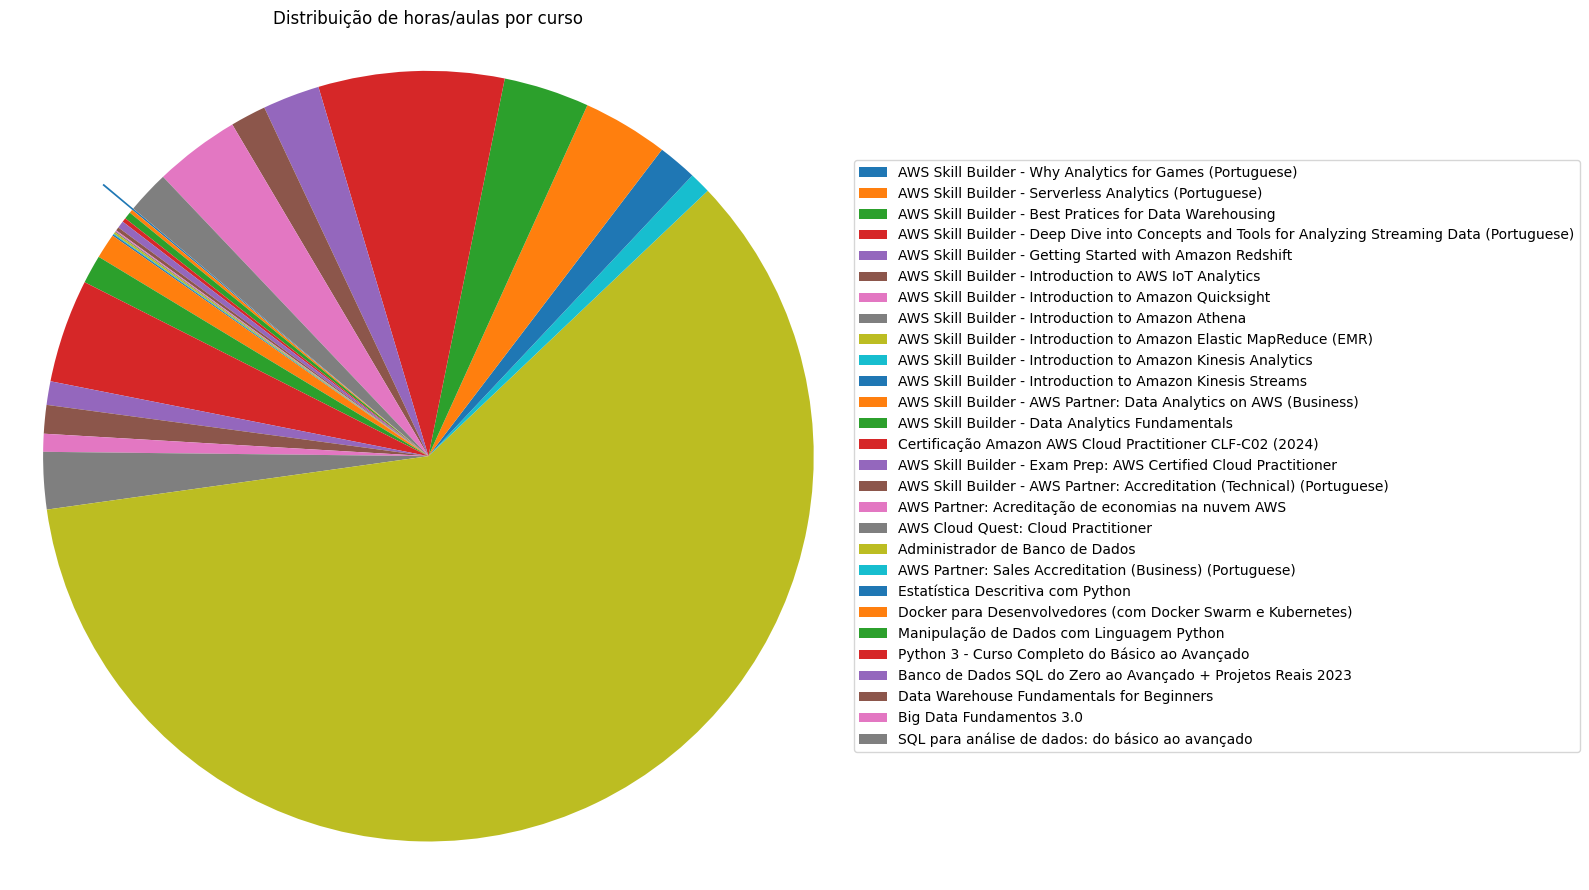

In [204]:
explode = [0.1 if i == 0 else 0 for i in range(len(class_hours_dates))]

plt.figure(figsize=(16, 9))

patches, _, autotexts = plt.pie(class_hours_dates['class_hours'], labels=None, autopct='', startangle=140, explode=explode)
plt.axis('equal')
plt.title("Distribuição de horas/aulas por curso")

for autotext in autotexts:
    autotext.set_fontsize(10)

plt.legend(patches, class_hours_dates['title'], loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

### Quantas horas/aulas, em média, consigo cumprir por dia?


In [205]:
average_hours_per_day =  total_class_hours / total_days
print("Em média, consigo cumprir: ", average_hours_per_day, " horas/aulas por dia")

Em média, consigo cumprir:  3.3401  horas/aulas por dia


Gráfico da média de estudo (medida pelas horas/aulas) por sermana

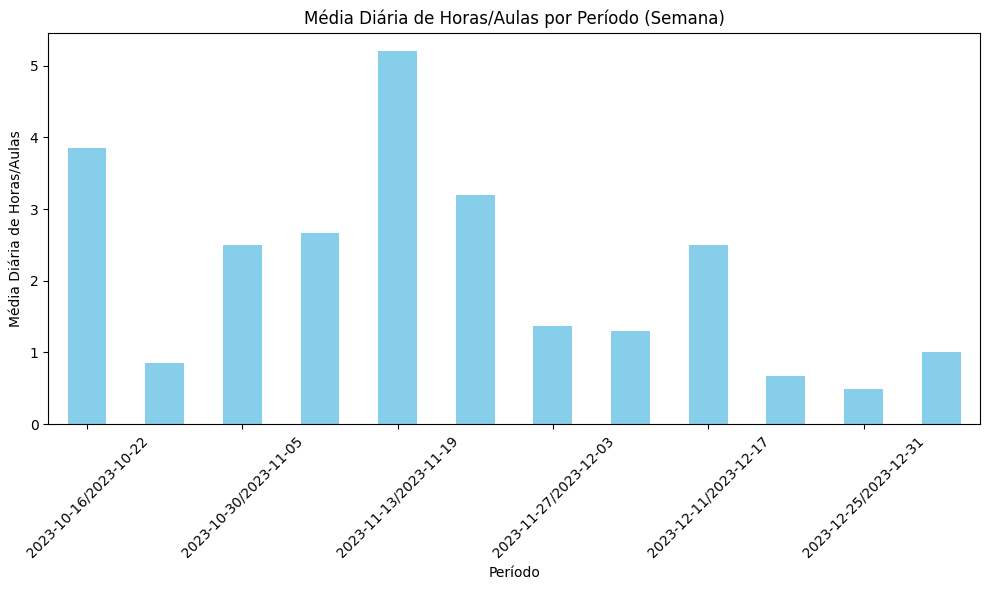

In [206]:
class_hours_dates = class_hours_dates.copy()

# Calculando o período e ajustando os tipos de dados
class_hours_dates['period'] = class_hours_dates['started_at'].dt.to_period('W')
class_hours_dates['days'] = (class_hours_dates['ended_at'] - class_hours_dates['started_at']).dt.days + 1

# Calculando a média diária por curso
class_hours_dates['daily_avg'] = class_hours_dates['class_hours'] / class_hours_dates['days']

# Agrupando por período e calculando a média diária média para cada período (por mês)
grouped = class_hours_dates.groupby('period')['daily_avg'].mean()

# Criando o gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar', color='skyblue')
plt.xlabel('Período')
plt.ylabel('Média Diária de Horas/Aulas')
plt.title('Média Diária de Horas/Aulas por Período (Semana)')
plt.xticks(rotation=0)

plt.xticks(range(0, len(grouped), 2), grouped.index[::2], rotation=45)


plt.tight_layout()
plt.show()

### Quanto tempo médio levaria para concluir cursos com carga horária dentro do intervalo de carga horária dos cursos concluídos?

Gráfico com a tendência de tempo médio (em dias) para concluir um curso com a carga horária no intervalo entre o curso com menor carga horária e o maior carga horária.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


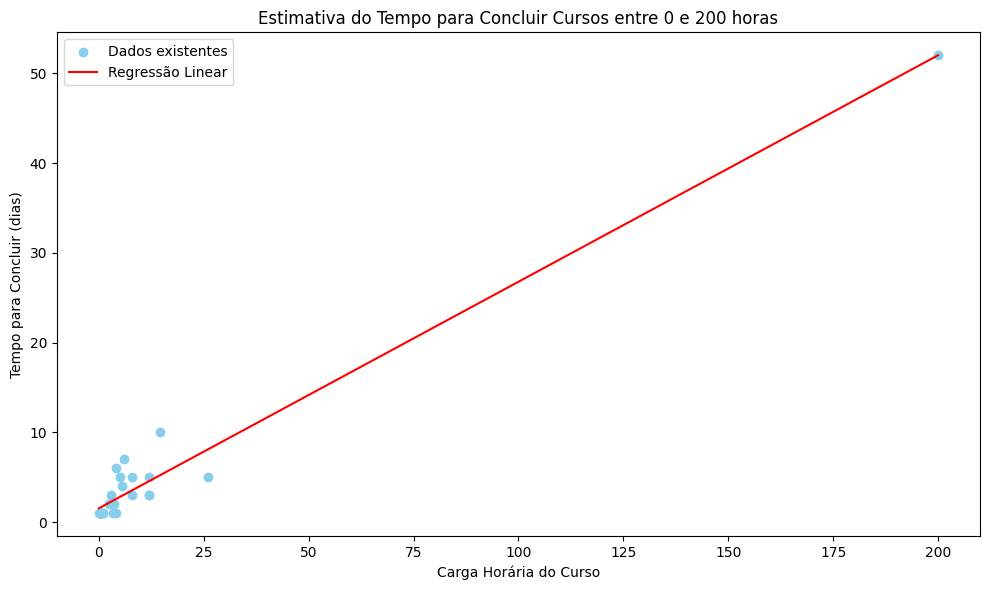

In [207]:
smallest_class_hour = int(class_hours_dates['class_hours'].nsmallest(1).values[0])
largest_class_hour = int(class_hours_dates['class_hours'].nlargest(1).values[0])

filtered_data = class_hours_dates[(class_hours_dates['class_hours'] >= smallest_class_hour) & (class_hours_dates['class_hours'] <= largest_class_hour)]

# Criando um modelo de regressão linear
model = LinearRegression()
model.fit(filtered_data[['class_hours']], filtered_data['days'])

# Estimando o tempo para cursos entre a menor e a maior carga horária
hours_to_predict = np.array(list(range(smallest_class_hour, largest_class_hour + 1))).reshape(-1, 1)
predicted_days = model.predict(hours_to_predict)

plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['class_hours'], filtered_data['days'], color='skyblue', label='Dados existentes')
plt.plot(hours_to_predict, predicted_days, color='red', label='Regressão Linear')
plt.xlabel('Carga Horária do Curso')
plt.ylabel('Tempo para Concluir (dias)')
plt.title(f'Estimativa do Tempo para Concluir Cursos entre {smallest_class_hour} e {largest_class_hour} horas')

plt.legend()
plt.tight_layout()
plt.show()
